In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
# Import ML ready data. 
data = pd.read_csv('model_ready_match_data_multi_class.csv')
data.head()

,goals,shots,shot_percent,passes_made,pass_attempts,pass_percent,tackles_made,tackle_attempts,tackle_percent,red_cards,players_in_match,forwards,midfielders,defenders,goalkeeper,any,result
0,1,6,0.17,95,125,0.76,18,49,0.37,0,8,2,3,3,0,0,1
1,5,13,0.38,92,120,0.77,13,29,0.45,0,8,2,3,3,0,0,2
2,1,7,0.14,99,124,0.80,17,65,0.26,0,10,2,4,4,0,0,0
3,1,11,0.09,154,195,0.79,16,41,0.39,0,11,2,4,4,1,0,1
4,3,13,0.23,118,145,0.81,10,43,0.23,0,10,2,4,4,0,0,2


In [3]:
# Split the Data into X, Y
X = data.drop("result", axis=1)
y = data.result

In [4]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# Generate the Model
classifier = RandomForestClassifier(n_estimators=500, criterion ='entropy', random_state = 1)

In [6]:
# Train the model
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

In [7]:
# Predict the test data
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 0, ..., 2, 0, 2], dtype=int64)

In [8]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5202  303 1219]
 [1502  315 1109]
 [ 998  187 5740]]


In [9]:
# Output Accuracy score
accuracy_score(y_test, y_pred)

0.6791553544494721

In [10]:
# Print Classifcation report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      6724
           1       0.39      0.11      0.17      2926
           2       0.71      0.83      0.77      6925

    accuracy                           0.68     16575
   macro avg       0.59      0.57      0.55     16575
weighted avg       0.64      0.68      0.64     16575



In [11]:
# Generate the Feature importance
classifier.feature_importances_

array([0.14795555, 0.06864816, 0.11801173, 0.09658849, 0.10484444,
       0.08671479, 0.05467881, 0.08918318, 0.08260923, 0.00830015,
       0.04036578, 0.03239389, 0.03711553, 0.0151157 , 0.00865387,
       0.00882069])

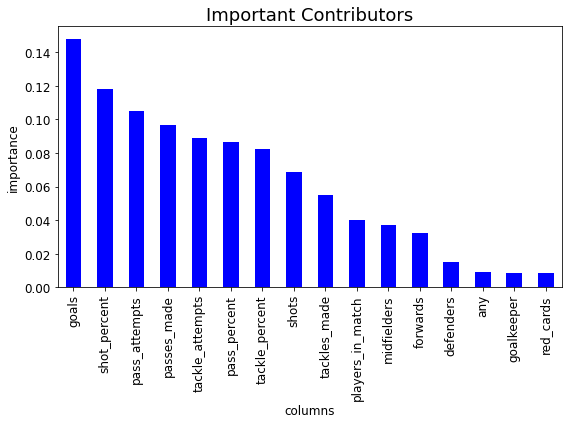

In [12]:
# Generate bar graph of feature importance. 
importance = classifier.feature_importances_
columns = X_train.columns
combined_features = pd.Series(importance, columns)

# sort the combined_features series in descending order
combined_features_sorted = combined_features.sort_values(ascending=False)

# plot the sorted series
pandas_plot = combined_features_sorted.plot.bar(figsize=(8,6), color='b', fontsize = 12)
plt.xlabel("columns", fontsize = 12)
plt.ylabel("importance", fontsize = 12)
plt.title("Important Contributors", fontsize = 18)
plt.tight_layout()
plt.show()